In [10]:
# install pickle5
!pip install pickle5

import pandas as pd
import cv2
import pickle
import pickle5
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
import xgboost as xgb
from cmatrix import make_confusion_matrix
import sklearn


xx_train = pd.read_csv('https://git.uwaterloo.ca/aaljmiai/datasets/-/raw/master/ahdd1/csvTrainImages_60k_x_784.csv', header=None)
xx_test = pd.read_csv('https://git.uwaterloo.ca/aaljmiai/datasets/-/raw/master/ahdd1/csvTestImages_10k_x_784.csv', header=None)
yy_train = pd.read_csv('https://git.uwaterloo.ca/aaljmiai/datasets/-/raw/master/ahdd1/csvTrainLabel_60k_x_1.csv', header=None)
yy_test = pd.read_csv('https://git.uwaterloo.ca/aaljmiai/datasets/-/raw/master/ahdd1/csvTestLabel_10k_x_1.csv', header=None)


# Reducing number of features from 28x28 to 8x8 by resizing the image using opencv
# dsize
width  = 8
height = 8
dsize = (width, height)

df = []
for row in xx_train.to_numpy():
  # resize image
  im = cv2.resize(row.reshape(28,28).astype('float32'), dsize, interpolation = cv2.INTER_AREA)
  df.append(im.reshape(-1,))
  
x_train = pd.DataFrame(df)


df = []
for row in xx_test.to_numpy():
  # resize image
  im = cv2.resize(row.reshape(28,28).astype('float32'), dsize, interpolation = cv2.INTER_AREA)
  df.append(im.reshape(-1,))
  
x_test = pd.DataFrame(df)

# scaling images between 0-1 
x_train /=255 
x_test  /=255
y_train = yy_train.copy()
y_test = yy_test.copy()


In [9]:
with open('drive/MyDrive/ML/gbm_n_estimators60000_objective_softmax_8_by_8_pix.pickle', 'rb') as handle:
    gbm = pickle.load(handle)

with open('drive/MyDrive/ML/svm_grid_search_cv_n_datapoint_10000_28_by_28_pix.pickle', 'rb') as handle:
    svm = pickle.load(handle)

with open('drive/MyDrive/ML/old/rfc1000.pickle', 'rb') as handle:
    rfc = pickle.load(handle)

with open('drive/MyDrive/ML/old/GB.pickle', 'rb') as handle:
    gb = pickle5.load(handle)

with open('drive/MyDrive/ML/old/GS_logistic.pickle', 'rb') as handle:
    gsl = pickle5.load(handle)

with open('drive/MyDrive/ML/old/KNeighborsClassifier_n=4.pickle', 'rb') as handle:
    knn = pickle.load(handle)

with open('drive/MyDrive/ML/Scaled255/RF_RandomizedSearchCV.pickle', 'rb') as handle:
    rf_sd = pickle.load(handle)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 0.22.2.post1. This might lead to breakin

In [19]:
ypred_gbm = gbm.predict(x_test)
ypred_svm = svm.predict(xx_test)
ypred_rfc = rfc.predict(xx_test)
ypred_gb = gb.predict(xx_test)
ypred_gsl = gsl.predict(xx_test)
ypred_knn = knn.predict(xx_test)
ypred_rf_sd = rf_sd.predict(xx_test/255)

,precision,recall,f1-score,support
0,0.980981,0.9800,0.980490,1000.0000
1,0.978239,0.9890,0.983590,1000.0000
2,0.968317,0.9780,0.973134,1000.0000
3,0.988798,0.9710,0.979818,1000.0000
4,0.982949,0.9800,0.981472,1000.0000
5,0.980924,0.9770,0.978958,1000.0000
6,0.986014,0.9870,0.986507,1000.0000
7,0.993988,0.9920,0.992993,1000.0000
8,0.987988,0.9870,0.987494,1000.0000
9,0.978153,0.9850,0.981565,1000.0000


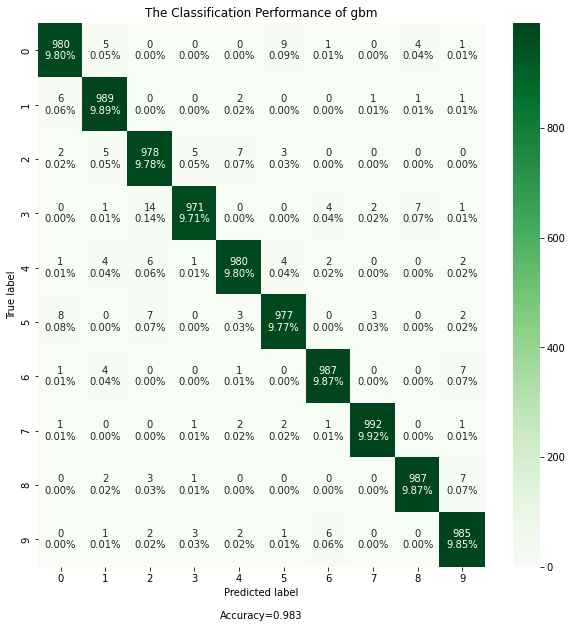

In [21]:
make_confusion_matrix(sklearn.metrics.confusion_matrix(y_test,ypred_gbm), figsize = (10,10),
                      title='The Classification Performance of gbm' ,cmap='Greens')

pd.DataFrame(sklearn.metrics.classification_report(y_test, ypred_gbm, digits=3, output_dict=True)).T

,precision,recall,f1-score,support
0,0.975610,0.9600,0.967742,1000.0000
1,0.974232,0.9830,0.978596,1000.0000
2,0.956653,0.9490,0.952811,1000.0000
3,0.928023,0.9670,0.947111,1000.0000
4,0.956306,0.9630,0.959641,1000.0000
5,0.969854,0.9330,0.951070,1000.0000
6,0.979508,0.9560,0.967611,1000.0000
7,0.986721,0.9660,0.976251,1000.0000
8,0.972477,0.9540,0.963150,1000.0000
9,0.903558,0.9650,0.933269,1000.0000


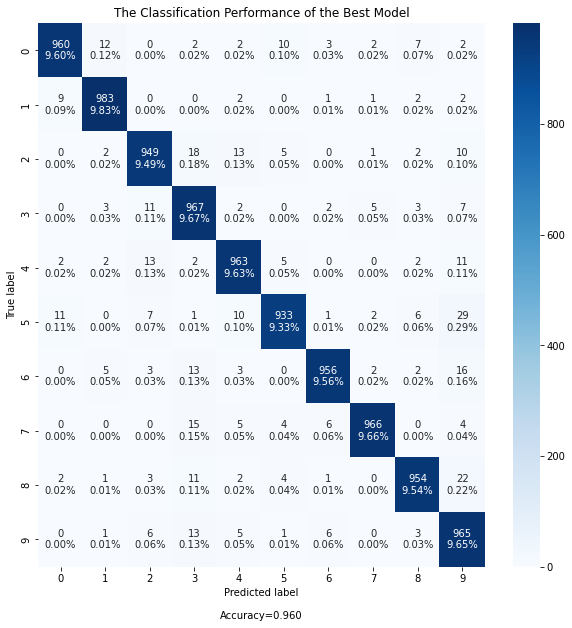

In [22]:
make_confusion_matrix(sklearn.metrics.confusion_matrix(yy_test,ypred_svm), figsize = (10,10),
                      title='The Classification Performance of the Best Model' ,cmap='Blues')

pd.DataFrame(sklearn.metrics.classification_report(y_test, ypred_svm, digits=3, output_dict=True)).T

,precision,recall,f1-score,support
0,0.979084,0.9830,0.981038,1000.0000
1,0.985986,0.9850,0.985493,1000.0000
2,0.973134,0.9780,0.975561,1000.0000
3,0.984802,0.9720,0.978359,1000.0000
4,0.984970,0.9830,0.983984,1000.0000
5,0.975149,0.9810,0.978066,1000.0000
6,0.991992,0.9910,0.991496,1000.0000
7,0.997984,0.9900,0.993976,1000.0000
8,0.994975,0.9900,0.992481,1000.0000
9,0.971429,0.9860,0.978660,1000.0000


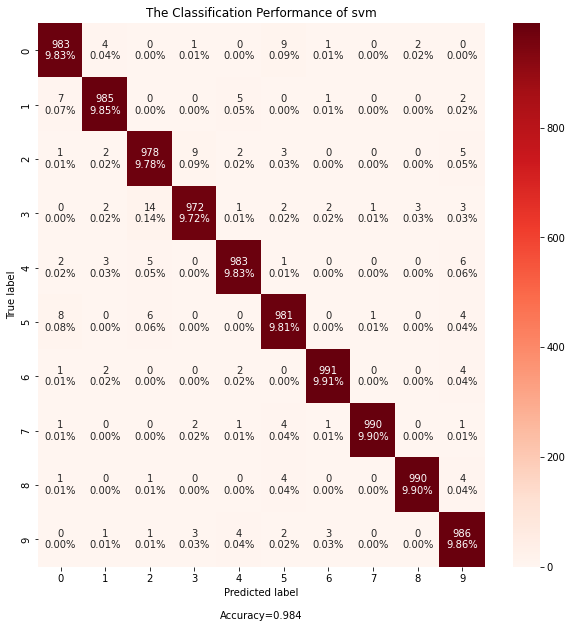

In [24]:
make_confusion_matrix(sklearn.metrics.confusion_matrix(yy_test,ypred_rfc), figsize = (10,10),
                      title='The Classification Performance of svm' ,cmap='Reds')


pd.DataFrame(sklearn.metrics.classification_report(y_test, ypred_rfc, digits=3, output_dict=True)).T

,precision,recall,f1-score,support
0,0.975610,0.9600,0.967742,1000.0000
1,0.974232,0.9830,0.978596,1000.0000
2,0.956653,0.9490,0.952811,1000.0000
3,0.928023,0.9670,0.947111,1000.0000
4,0.956306,0.9630,0.959641,1000.0000
5,0.969854,0.9330,0.951070,1000.0000
6,0.979508,0.9560,0.967611,1000.0000
7,0.986721,0.9660,0.976251,1000.0000
8,0.972477,0.9540,0.963150,1000.0000
9,0.903558,0.9650,0.933269,1000.0000


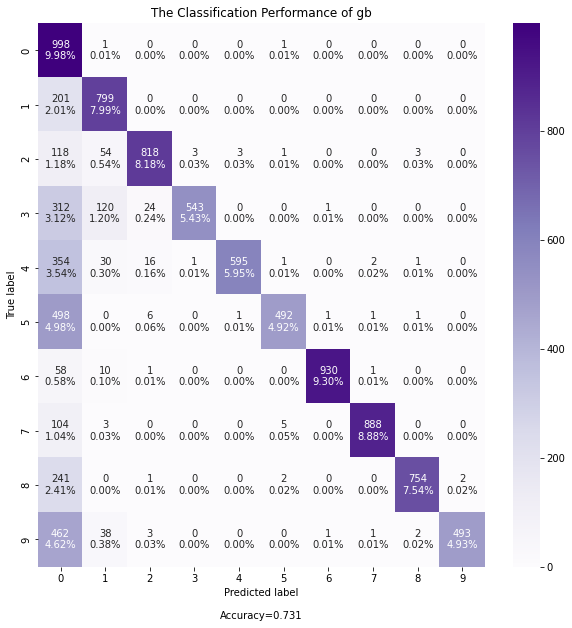

In [25]:
make_confusion_matrix(sklearn.metrics.confusion_matrix(yy_test,ypred_gb), figsize = (10,10),
                      title='The Classification Performance of gb' ,cmap='Purples')


pd.DataFrame(sklearn.metrics.classification_report(y_test, ypred_svm, digits=3, output_dict=True)).T

,precision,recall,f1-score,support
0,0.975610,0.9600,0.967742,1000.0000
1,0.974232,0.9830,0.978596,1000.0000
2,0.956653,0.9490,0.952811,1000.0000
3,0.928023,0.9670,0.947111,1000.0000
4,0.956306,0.9630,0.959641,1000.0000
5,0.969854,0.9330,0.951070,1000.0000
6,0.979508,0.9560,0.967611,1000.0000
7,0.986721,0.9660,0.976251,1000.0000
8,0.972477,0.9540,0.963150,1000.0000
9,0.903558,0.9650,0.933269,1000.0000


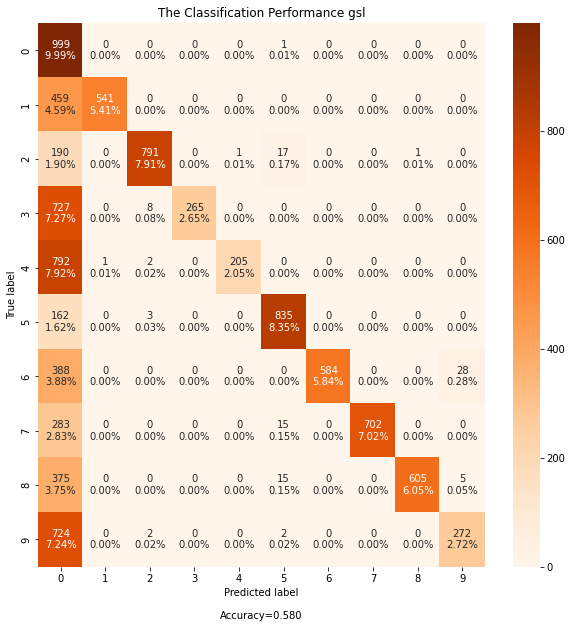

In [27]:
make_confusion_matrix(sklearn.metrics.confusion_matrix(yy_test,ypred_gsl), figsize = (10,10),
                      title='The Classification Performance gsl' ,cmap='Oranges')

pd.DataFrame(sklearn.metrics.classification_report(yy_test, ypred_svm, digits=3, output_dict=True)).T

,precision,recall,f1-score,support
0,0.975610,0.9600,0.967742,1000.0000
1,0.974232,0.9830,0.978596,1000.0000
2,0.956653,0.9490,0.952811,1000.0000
3,0.928023,0.9670,0.947111,1000.0000
4,0.956306,0.9630,0.959641,1000.0000
5,0.969854,0.9330,0.951070,1000.0000
6,0.979508,0.9560,0.967611,1000.0000
7,0.986721,0.9660,0.976251,1000.0000
8,0.972477,0.9540,0.963150,1000.0000
9,0.903558,0.9650,0.933269,1000.0000


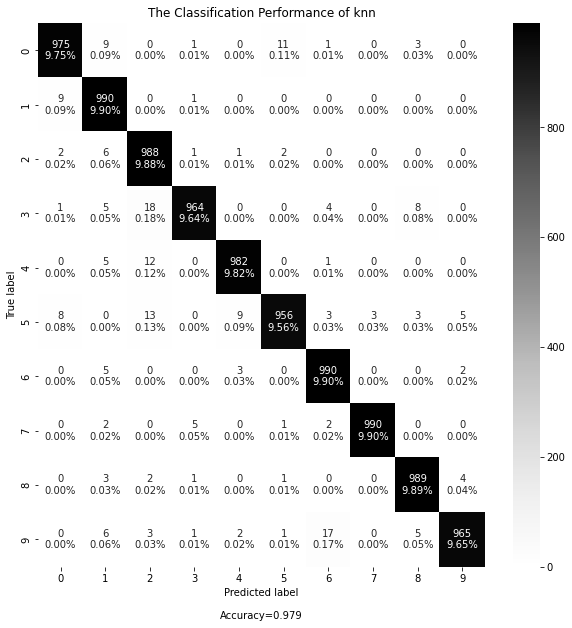

In [28]:
make_confusion_matrix(sklearn.metrics.confusion_matrix(yy_test,ypred_knn), figsize = (10,10),
                      title='The Classification Performance of knn' ,cmap='Greys')


pd.DataFrame(sklearn.metrics.classification_report(y_test, ypred_svm, digits=3, output_dict=True)).T

,precision,recall,f1-score,support
0,0.975610,0.9600,0.967742,1000.0000
1,0.974232,0.9830,0.978596,1000.0000
2,0.956653,0.9490,0.952811,1000.0000
3,0.928023,0.9670,0.947111,1000.0000
4,0.956306,0.9630,0.959641,1000.0000
5,0.969854,0.9330,0.951070,1000.0000
6,0.979508,0.9560,0.967611,1000.0000
7,0.986721,0.9660,0.976251,1000.0000
8,0.972477,0.9540,0.963150,1000.0000
9,0.903558,0.9650,0.933269,1000.0000


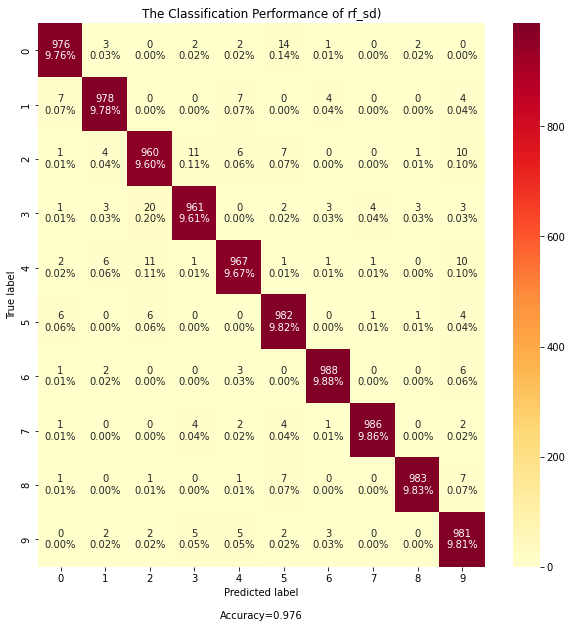

In [29]:
make_confusion_matrix(sklearn.metrics.confusion_matrix(yy_test,ypred_rf_sd), figsize = (10,10),
                      title='The Classification Performance of rf_sd)' ,cmap='YlOrRd')


pd.DataFrame(sklearn.metrics.classification_report(y_test, ypred_svm, digits=3, output_dict=True)).T

In [35]:
models = [gbm, svm, rfc, gb, gsl, knn, rf_sd]

In [36]:
f1cv = []
for m in models:
  cv = []
  for i in range(10):
    if m != gbm and m != rf_sd:
      yy_pred = pd.DataFrame(m.predict(xx_test[999*i:999*(i+1)]))
    elif m == gbm:
      yy_pred = pd.DataFrame(m.predict(x_test[999*i:999*(i+1)]))
    elif m == rf_sd :
      yy_pred = pd.DataFrame(m.predict(xx_test[999*i:999*(i+1)]/255))
    
    cv.append(f1_score(yy_test[999*i:999*(i+1)],yy_pred, average='weighted'))
  f1cv.append((m, cv))

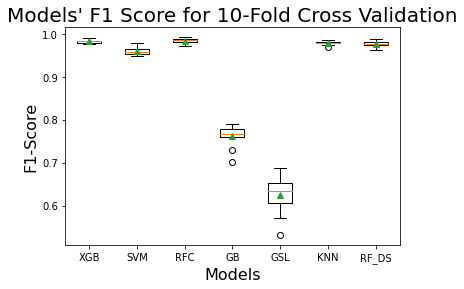

In [41]:
pyplot.boxplot(f1cv, labels=['XGB', 'SVM', "RFC", "GB", "GSL", "KNN", "RF_DS"], showmeans=True)
pyplot.title("Models' F1 Score for 10-Fold Cross Validation", fontsize = 20)
pyplot.xlabel('Models', fontsize = 16)
pyplot.ylabel('F1-Score', fontsize= 16)
pyplot.show()

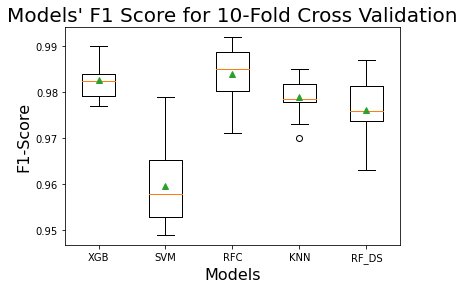

In [46]:
pyplot.boxplot(f1cv, labels=['XGB', 'SVM', "RFC", "KNN", "RF_DS"], showmeans=True)
pyplot.title("Models' F1 Score for 10-Fold Cross Validation", fontsize = 20)
pyplot.xlabel('Models', fontsize = 16)
pyplot.ylabel('F1-Score', fontsize= 16)
pyplot.show()